In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam

In [2]:
df = pd.read_csv('resources/fifa-18-demo-player-dataset/CompleteDataset.csv')
df.drop(['Unnamed: 0', 'Flag', 'Club Logo', 'Value', 'Wage', 'Photo', 'Potential', "Special"], axis=1, inplace=True)
df[df['Nationality']=='Serbia'][['Name', 'Preferred Positions']]

/Users/chandra/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Name,Preferred Positions
155,N. Matić,CM CDM
264,L. Fejsa,CM CDM
270,B. Ivanović,RB CB
393,S. Milinković-Savić,CAM CM
415,M. Nastasić,CB
428,D. Tadić,RM LM CAM
491,D. Basta,RM RB
530,N. Maksimović,CB
610,A. Ljajić,CAM LW
627,A. Kolarov,CB LB


In [3]:
positions_list = list(df['Preferred Positions'].apply(lambda x: x.split(' ', 1)[0]).drop_duplicates())
positions_list

['ST',
 'RW',
 'LW',
 'GK',
 'CDM',
 'CB',
 'RM',
 'CM',
 'LM',
 'LB',
 'CAM',
 'RB',
 'CF',
 'RWB',
 'LWB']

In [4]:
positions_dict = {'ST': 'Attack',
                  'RW': 'Attack',
                  'LW': 'Attack',
                  'GK': 'Defense',
                  'CDM': 'Midfield',
                  'CB': 'Defense',
                  'RM': 'Midfield',
                  'CM': 'Midfield',
                  'LM': 'Midfield',
                  'LB': 'Defense',
                  'CAM': 'Attack',
                  'RB': 'Defense',
                  'CF': 'Attack',
                  'RWB': 'Defense',
                  'LWB': 'Defense'}

In [5]:
df2 = df[['Name', 'Club', 'Nationality', 'Preferred Positions', 'Overall']].copy()
df2['Preferred Positions'] = df2['Preferred Positions'].apply(lambda x: x.split(' ', 1)[0]).replace(positions_dict)

team = 'Brazil'
df2[df2['Nationality'] == team].head(14).groupby(['Nationality', 'Preferred Positions']).mean()

Overall
Nationality Preferred Positions           
Brazil      Attack               87.333333
            Defense              85.250000
            Midfield             84.666667

In [6]:
epl2018 = pd.read_csv('resources/leagues/epl2018.csv')
epl2018.head()

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,...,2.32,21,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25
1,1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,...,2.27,20,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29
2,2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,...,2.23,20,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25
3,3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,...,1.72,18,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51
4,4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,...,1.76,19,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42


In [7]:
bundesliga2018 = pd.read_csv('resources/leagues/bundesliga2018.csv')
bundesliga2018.head()

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,0,D1,18/08/17,Bayern Munich,Leverkusen,3,1,H,2,0,...,2.88,17,-2.00,2.26,2.18,1.77,1.72,1.28,6.70,11.30
1,1,D1,19/08/17,Hamburg,Augsburg,1,0,H,1,0,...,1.68,18,-0.25,1.88,1.84,2.07,2.03,2.32,3.32,3.47
2,2,D1,19/08/17,Hertha,Stuttgart,2,0,H,0,0,...,1.87,18,-0.50,2.09,2.05,1.87,1.83,2.02,3.60,4.07
3,3,D1,19/08/17,Hoffenheim,Werder Bremen,1,0,H,0,0,...,2.50,16,-0.75,2.04,1.98,1.91,1.88,1.85,4.19,4.12
4,4,D1,19/08/17,Mainz,Hannover,0,1,A,0,0,...,1.76,16,-0.50,2.01,1.97,1.93,1.89,1.85,3.75,4.65


In [8]:
seriea2018 = pd.read_csv('resources/leagues/seriea2018.csv')
seriea2018.head()

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,0,I1,19/08/17,Juventus,Cagliari,3,0,H,2,0,...,2.41,16,-2.00,1.83,1.80,2.13,2.07,1.13,9.74,27.70
1,1,I1,19/08/17,Verona,Napoli,1,3,A,0,2,...,2.29,16,1.25,1.98,1.95,1.97,1.92,8.37,5.21,1.41
2,2,I1,20/08/17,Atalanta,Roma,0,1,A,0,1,...,2.06,16,0.25,1.91,1.88,2.04,1.99,2.99,3.44,2.53
3,3,I1,20/08/17,Bologna,Torino,1,1,D,1,1,...,1.75,16,0.25,1.90,1.87,2.06,2.00,3.35,3.47,2.31
4,4,I1,20/08/17,Crotone,Milan,0,3,A,0,3,...,2.06,17,1.00,1.89,1.85,2.08,2.02,7.42,4.37,1.52


In [9]:
laliga2018 = pd.read_csv('resources/leagues/laliga2018.csv')
laliga2018.head()

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,0,SP1,18/08/17,Leganes,Alaves,1,0,H,1,0,...,1.46,18,-0.50,2.07,2.03,1.90,1.86,1.98,3.35,4.63
1,1,SP1,18/08/17,Valencia,Las Palmas,1,0,H,1,0,...,2.27,16,-0.75,2.05,1.97,1.96,1.91,1.78,4.24,4.43
2,2,SP1,19/08/17,Celta,Sociedad,2,3,A,1,1,...,1.84,18,-0.25,2.08,2.05,1.87,1.83,2.12,3.53,3.74
3,3,SP1,19/08/17,Girona,Ath Madrid,2,2,D,2,0,...,1.74,16,1.25,1.77,1.75,2.25,2.16,6.93,3.83,1.63
4,4,SP1,19/08/17,Sevilla,Espanol,1,1,D,1,1,...,2.09,16,-1.00,2.12,2.06,1.86,1.82,1.64,4.18,5.82


In [10]:
results_dict = {'H': 2, "D": 1, "A": 0}
cols = ['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']
test_df = epl2018[cols].rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals', 'FTR': 'Results'}).copy()
test_df['Results'] = test_df['Results'].replace(results_dict)
test_df

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Results
0,Arsenal,Leicester,4,3,2
1,Brighton,Man City,0,2,0
2,Chelsea,Burnley,2,3,0
3,Crystal Palace,Huddersfield,0,3,0
4,Everton,Stoke,1,0,2
5,Southampton,Swansea,0,0,1
6,Watford,Liverpool,3,3,1
7,West Brom,Bournemouth,1,0,2
8,Man United,West Ham,4,0,2
9,Newcastle,Tottenham,0,2,0


In [11]:
player_overall_df = df[['Name', 'Club', 'Nationality', 'Preferred Positions', 'Overall']].copy()
player_overall_df['Preferred Positions'] = player_overall_df['Preferred Positions'].apply(lambda x: x.split(' ', 1)[0]).replace(positions_dict)

In [12]:
def get_team_stats(team, type='Club', no_of_players=13, return_df=False):
    mask = df2[type] == team
    groupby_cols = [type, 'Preferred Positions']
    team_stats_df = player_overall_df[mask].head(no_of_players).groupby(groupby_cols).mean().round(0)
    if return_df == True:
        return team_stats_df
    else:
        df = team_stats_df.reset_index().pivot(type, 'Preferred Positions')
        return df['Overall'].values.tolist()

In [13]:
get_team_stats('Chelsea', return_df=True)

Overall
Club    Preferred Positions         
Chelsea Attack                  86.0
        Defense                 85.0
        Midfield                84.0

In [14]:
get_team_stats('Chelsea')

[[86.0, 85.0, 84.0]]

In [15]:
epl_teams = list(test_df['HomeTeam'].drop_duplicates().values)
epl_teams

['Arsenal',
 'Brighton',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Southampton',
 'Watford',
 'West Brom',
 'Man United',
 'Newcastle',
 'Bournemouth',
 'Burnley',
 'Leicester',
 'Liverpool',
 'Stoke',
 'Swansea',
 'Huddersfield',
 'Tottenham',
 'Man City',
 'West Ham']

In [16]:
epl_team_dict = {'Arsenal': 'Arsenal',
                 'Brighton': 'Brighton & Hove Albion',
                 'Chelsea': 'Chelsea',
                 'Crystal Palace': 'Crystal Palace',
                 'Everton': 'Everton',
                 'Southampton': 'Southampton',
                 'Watford': 'Watford',
                 'West Brom': 'West Bromwich Albion',
                 'Man United': 'Manchester United',
                 'Newcastle': 'Newcastle United',
                 'Bournemouth': 'Bournemouth',
                 'Burnley': 'Burnley',
                 'Leicester': 'Leicester City',
                 'Liverpool': 'Liverpool',
                 'Stoke': 'Stoke City',
                 'Swansea': 'Swansea City',
                 'Huddersfield': 'Huddersfield Town',
                 'Tottenham': 'Tottenham Hotspur',
                 'Man City': 'Manchester City',
                 'West Ham': 'West Ham United'}

In [17]:
bund_teams = list(bundesliga2018['HomeTeam'].drop_duplicates().values)
bund_teams

['Bayern Munich',
 'Hamburg',
 'Hertha',
 'Hoffenheim',
 'Mainz',
 'Schalke 04',
 'Wolfsburg',
 'Freiburg',
 "M'gladbach",
 'FC Koln',
 'Augsburg',
 'Dortmund',
 'Ein Frankfurt',
 'Leverkusen',
 'Stuttgart',
 'Werder Bremen',
 'Hannover',
 'RB Leipzig']

In [18]:
bundesliga_team_dict = {'Bayern Munich': 'FC Bayern Munich',
                        'Hamburg': 'Hamburger SV',
                        'Hertha': 'Hertha BSC Berlin',
                        'Hoffenheim': 'TSG 1899 Hoffenheim',
                        'Mainz': '1. FSV Mainz 05',
                        'Schalke 04': 'FC Schalke 04',
                        'Wolfsburg': 'VfL Wolfsburg',
                        'Freiburg': 'SC Freiburg',
                        "M'gladbach": 'Borussia Mönchengladbach',
                        'FC Koln': '1. FC Köln',
                        'Augsburg': 'FC Augsburg',
                        'Dortmund': 'Borussia Dortmund',
                        'Ein Frankfurt': 'Eintracht Frankfurt',
                        'Leverkusen': 'Bayer 04 Leverkusen',
                        'Stuttgart': 'VfB Stuttgart',
                        'Werder Bremen': 'SV Werder Bremen',
                        'Hannover': 'Hannover 96',
                        'RB Leipzig': 'RB Leipzig'}

In [19]:
laliga_teams = list(laliga2018['HomeTeam'].drop_duplicates().values)
laliga_teams

['Leganes',
 'Valencia',
 'Celta',
 'Girona',
 'Sevilla',
 'Ath Bilbao',
 'Barcelona',
 'La Coruna',
 'Levante',
 'Malaga',
 'Betis',
 'Sociedad',
 'Alaves',
 'Las Palmas',
 'Eibar',
 'Espanol',
 'Getafe',
 'Real Madrid',
 'Villarreal',
 'Ath Madrid']

In [20]:
laliga_team_dict = {'Leganes': 'CD Leganés',
                    'Valencia': 'Valencia CF',
                    'Celta': 'RC Celta de Vigo',
                    'Girona': 'Girona CF',
                    'Sevilla': 'Sevilla FC',
                    'Ath Bilbao': 'Athletic Club de Bilbao',
                    'Barcelona': 'FC Barcelona',
                    'La Coruna': 'RC Deportivo de La Coruña',
                    'Levante': 'Levante UD',
                    'Malaga': 'Málaga CF',
                    'Betis': 'Real Betis Balompié',
                    'Sociedad': 'Real Sociedad',
                    'Alaves': 'Deportivo Alavés',
                    'Las Palmas': 'UD Las Palmas',
                    'Eibar': 'SD Eibar',
                    'Espanol': 'RCD Espanyol',
                    'Getafe': 'Getafe CF',
                    'Real Madrid': 'Real Madrid CF',
                    'Villarreal': 'Villarreal CF',
                    'Ath Madrid': 'Atlético Madrid'
                    }

In [21]:
seriea_teams = list(seriea2018['HomeTeam'].drop_duplicates().values)
seriea_teams

['Juventus',
 'Verona',
 'Atalanta',
 'Bologna',
 'Crotone',
 'Inter',
 'Lazio',
 'Sampdoria',
 'Sassuolo',
 'Udinese',
 'Benevento',
 'Genoa',
 'Roma',
 'Chievo',
 'Fiorentina',
 'Milan',
 'Napoli',
 'Spal',
 'Torino',
 'Cagliari']

In [22]:
seriea_teams_dict = {'Juventus': 'Juventus',
                     'Verona': 'Hellas Verona',
                     'Atalanta': 'Atalanta',
                     'Bologna': 'Bologna',
                     'Crotone': 'Crotone',
                     'Inter': 'Inter',
                     'Lazio': 'Lazio',
                     'Sampdoria': 'Sampdoria',
                     'Sassuolo': 'Sassuolo',
                     'Udinese': 'Udinese',
                     'Benevento': 'Benevento Calcio',
                     'Genoa': 'Genoa',
                     'Roma': 'Roma',
                     'Chievo': 'Chievo Verona',
                     'Fiorentina': 'Fiorentina',
                     'Milan': 'Milan',
                     'Napoli': 'Napoli',
                     'Spal': 'Ferrara (SPAL)',
                     'Torino': 'Torino',
                     'Cagliari': 'Cagliari'
                    }

In [23]:
team_cols = ['HomeTeam', 'AwayTeam']
epl2018[team_cols] = epl2018[team_cols].replace(epl_team_dict)
bundesliga2018[team_cols] = bundesliga2018[team_cols].replace(bundesliga_team_dict)
seriea2018[team_cols] = seriea2018[team_cols].replace(seriea_teams_dict)
laliga2018[team_cols] = laliga2018[team_cols].replace(laliga_team_dict)

In [24]:
seriea2018['HomeTeam'].drop_duplicates().sort_values()

2             Atalanta
10    Benevento Calcio
3              Bologna
24            Cagliari
13       Chievo Verona
4              Crotone
18      Ferrara (SPAL)
15          Fiorentina
11               Genoa
1        Hellas Verona
5                Inter
0             Juventus
6                Lazio
16               Milan
17              Napoli
12                Roma
7            Sampdoria
8             Sassuolo
19              Torino
9              Udinese
Name: HomeTeam, dtype: object

In [104]:
results_dict = {'H': 'HomeWin', "D": 'Draw', "A": 'AwayWin'}
cols = ['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']

league_results_df = pd.concat([epl2018, bundesliga2018, seriea2018, laliga2018])[cols]
league_results_df.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals', 'FTR': 'Result'}, inplace=True)
league_results_df['Result'] = league_results_df['Result'].replace(results_dict)
league_results_df['Goal diff'] = league_results_df['HomeGoals'] - league_results_df['AwayGoals']

league_results_df.reset_index(drop=True, inplace=True)
league_results_df

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Goal diff
0,Arsenal,Leicester City,4,3,HomeWin,1
1,Brighton & Hove Albion,Manchester City,0,2,AwayWin,-2
2,Chelsea,Burnley,2,3,AwayWin,-1
3,Crystal Palace,Huddersfield Town,0,3,AwayWin,-3
4,Everton,Stoke City,1,0,HomeWin,1
5,Southampton,Swansea City,0,0,Draw,0
6,Watford,Liverpool,3,3,Draw,0
7,West Bromwich Albion,Bournemouth,1,0,HomeWin,1
8,Manchester United,West Ham United,4,0,HomeWin,4
9,Newcastle United,Tottenham Hotspur,0,2,AwayWin,-2


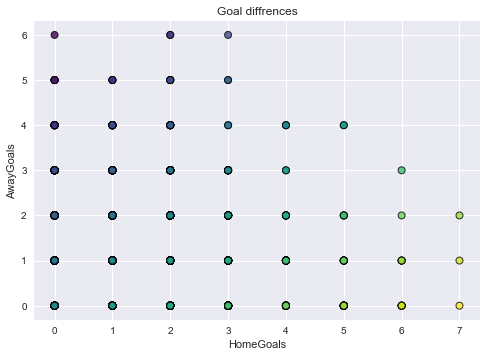

In [107]:
# league_results_df.plot(kind="bar", x="HomeTeam", y="AwayTeam", grid=True, figsize=(20,10), title="a_team vs b_team")
             
# plt.show()

plt.scatter(league_results_df["HomeGoals"],
            league_results_df["AwayGoals"],c=league_results_df["Goal diff"],
            marker="o", linewidths=1,
            facecolors="purple",
            cmap='viridis',
            edgecolors="black",
            alpha=0.8)

# plt.legend()
plt.style.use('seaborn')
# Templatcharttitle= CurDate,"City Latitude vs. Max Temparature (F)"
# plt.axhline(y=0,color='r',linestyle='-')
plt.title(f"Goal diffrences")
# plt.title(Templatcharttitle)
plt.ylabel("AwayGoals")
plt.xlabel("HomeGoals")

plt.savefig('gols.png')

In [26]:
# teams_list = list(league_results_df['HomeTeam'].drop_duplicates())
# team_rating_list = []

# teams_list[0]

# get_team_stats(teams_list[0])

# for team in teams_list:
#     print(get_team_stats(team))

# for team in teams_list:
#     rating = get_team_stats(team)
#     team_rating_list.append(rating)
    
# team_ratings = pd.DataFrame(data=team_rating_list, index=teams_list, columns=['team_rating']).sort_index()
# team_ratings_dict = team_ratings.to_dict()
# team_ratings_dict

In [27]:
# team_cols = ['HomeTeam', 'AwayTeam']
# league_results_df[team_cols] = league_results_df[team_cols].replace(team_ratings_dict['team_rating'])
# league_results_df

In [28]:
league_results_df['Result'].value_counts()

HomeWin    655
AwayWin    440
Draw       351
Name: Result, dtype: int64

In [29]:
homeTeam_attack = []
homeTeam_mid = []
homeTeam_def = []
awayTeam_attack = []
awayTeam_mid = []
awayTeam_def = []
data = []


for index, row in league_results_df.iterrows():
    try:
        home_team_stats = get_team_stats(row['HomeTeam'])
        home_attack = home_team_stats[0][0]
        home_midfield = home_team_stats[0][1]
        home_defense = home_team_stats[0][2]

        away_team_stats = get_team_stats(row['AwayTeam'])
        away_attack = away_team_stats[0][0]
        away_midfield = away_team_stats[0][1]
        away_defense = away_team_stats[0][2]
        
        if len(home_team_stats[0]) != 3 or len(away_team_stats[0]) != 3:
            homeTeam_attack.append(None)
            homeTeam_mid.append(None)
            homeTeam_def.append(None)
            awayTeam_attack.append(None)
            awayTeam_mid.append(None)
            awayTeam_def.append(None)
        else:            
            homeTeam_attack.append(home_attack)
            homeTeam_mid.append(home_midfield)
            homeTeam_def.append(home_defense)
            awayTeam_attack.append(away_attack)
            awayTeam_mid.append(away_midfield)
            awayTeam_def.append(away_defense)

        
    except IndexError:
        homeTeam_attack.append(None)
        homeTeam_mid.append(None)
        homeTeam_def.append(None)
        awayTeam_attack.append(None)
        awayTeam_mid.append(None)
        awayTeam_def.append(None)
        continue

In [30]:
data = [homeTeam_attack, 
        homeTeam_mid, 
        homeTeam_def, 
        awayTeam_attack,
        awayTeam_mid, 
        awayTeam_def]

feature_cols = ['homeTeam_attack', 
                'homeTeam_mid', 
                'homeTeam_def', 
                'awayTeam_attack', 
                'awayTeam_mid',
                'awayTeam_def']

home_cols = ['homeTeam_attack', 
                'homeTeam_mid', 
                'homeTeam_def', 
                'awayTeam_attack', 
                'awayTeam_mid',
                'awayTeam_def']

away_cols = ['awayTeam_attack', 
             'awayTeam_mid',
             'awayTeam_def',
             'homeTeam_attack', 
             'homeTeam_mid', 
             'homeTeam_def']

rename_cols = ['A_Team_attack', 
               'A_Team_mid',
               'A_Team_def',
               'B_Team_attack', 
               'B_Team_mid', 
               'B_Team_def']
             

team_ratings_df = pd.DataFrame(data, index=feature_cols)

In [31]:
team_ratings_df = team_ratings_df.transpose()
team_ratings_df['HomeGoals'] = league_results_df['HomeGoals']
team_ratings_df['AwayGoals'] = league_results_df['AwayGoals']
team_ratings_df['result'] = league_results_df['Result']

In [32]:
team_ratings_df.dropna(inplace=True)

In [33]:
home_team_df = team_ratings_df[home_cols].copy()
home_team_df.columns = rename_cols
away_team_df = team_ratings_df[away_cols].copy()
away_team_df.columns = rename_cols

X = pd.concat([home_team_df, away_team_df]).reset_index(drop=True)

In [34]:
X.head()

,A_Team_attack,A_Team_mid,A_Team_def,B_Team_attack,B_Team_mid,B_Team_def
0,85.0,83.0,83.0,80.0,78.0,78.0
1,76.0,75.0,75.0,89.0,83.0,85.0
2,86.0,85.0,84.0,75.0,77.0,75.0
3,78.0,76.0,79.0,75.0,73.0,74.0
4,81.0,81.0,82.0,78.0,79.0,77.0


In [35]:
print(X.shape)
X.iloc[[0,1370]]

(2892, 6)


,A_Team_attack,A_Team_mid,A_Team_def,B_Team_attack,B_Team_mid,B_Team_def
0,85.0,83.0,83.0,80.0,78.0,78.0
1370,80.0,78.0,78.0,81.0,81.0,81.0


In [36]:
y = pd.DataFrame(pd.concat([team_ratings_df['HomeGoals'], team_ratings_df['AwayGoals']]).reset_index(drop=True), columns=['goals'])

In [37]:
print(y.shape)
y.iloc[[0,1370]]

(2892, 1)


,goals
0,4
1370,4


In [38]:
y.head()

,goals
0,4
1,0
2,2
3,0
4,1


In [39]:
data = X.join(y)

In [40]:
data.head()

,A_Team_attack,A_Team_mid,A_Team_def,B_Team_attack,B_Team_mid,B_Team_def,goals
0,85.0,83.0,83.0,80.0,78.0,78.0,4
1,76.0,75.0,75.0,89.0,83.0,85.0,0
2,86.0,85.0,84.0,75.0,77.0,75.0,2
3,78.0,76.0,79.0,75.0,73.0,74.0,0
4,81.0,81.0,82.0,78.0,79.0,77.0,1


# SKLearn

In [41]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

/Users/chandra/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2169, 6)
(2169, 1)
(723, 6)
(723, 1)


In [43]:
# import model
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5, random_state=1)
clf = clf.fit(X_train, y_train)

# instantiate
linreg = LinearRegression()
logreg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

# fit the model to the training data (learn the coefficients)
# linreg.fit(X_train, y_train)
logreg.fit(X_train, y_train)
# clf.fit(X_train, y_train)

/Users/chandra/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chandra/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
X.head()

,A_Team_attack,A_Team_mid,A_Team_def,B_Team_attack,B_Team_mid,B_Team_def
0,85.0,83.0,83.0,80.0,78.0,78.0
1,76.0,75.0,75.0,89.0,83.0,85.0
2,86.0,85.0,84.0,75.0,77.0,75.0
3,78.0,76.0,79.0,75.0,73.0,74.0
4,81.0,81.0,82.0,78.0,79.0,77.0


# Poisson

In [45]:
# importing the tools required for the Poisson regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

# goal_model_data = pd.concat([epl_1617[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
#             columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
#            epl_1617[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
#             columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])


goal_model_data = X.join(y)

goal_model_data

poisson_model = smf.glm(formula="goals ~ A_Team_attack + A_Team_mid + A_Team_def + B_Team_attack + B_Team_mid + B_Team_def", data=data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

/Users/chandra/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                 2892
Model:                            GLM   Df Residuals:                     2885
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -4221.6
Date:                Mon, 11 Jun 2018   Deviance:                       3404.4
Time:                        19:08:42   Pearson chi2:                 3.01e+03
No. Iterations:                     5                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.6821      0.507     -3.317      0.001      -2.676      -0.688
A_Team_attack     0.0434      0.011      3.934      0.000       0.022       0.065
A_Team_mid        0.0020      0.012      0.170      0.865      -0.021       0.025
A_Team_def        0.0259      0.012      2.113      0.035       0.002       0.050
B_Team_attack    -0.0129      0.011     -1.149      0.250      -0.035       0.009
B_Team_mid       -0.0359      0.012     -2.903      0.004      -0.060      -0.012
B_Team_def        0.0020      0.013      0.155      0.877      -0.023       0.027
=================================================================================
"""

In [46]:
team_data_test1 = {'A_Team_attack': 84,
                  'A_Team_mid': 84,
                  'A_Team_def': 85,
                  'B_Team_attack': 80, 
                  'B_Team_mid': 78, 
                  'B_Team_def': 80}


poisson_model.predict(pd.DataFrame(data=team_data_test1, index=[1]))


1    1.932062
dtype: float64

In [47]:


team_data_test2 = {'A_Team_attack': 80,
                  'A_Team_mid': 78,
                  'A_Team_def': 80,
                  'B_Team_attack': 84, 
                  'B_Team_mid': 84, 
                  'B_Team_def': 85}


poisson_model.predict(pd.DataFrame(data=team_data_test2, index=[1]))

1    1.090379
dtype: float64

In [48]:
def show_game_summary(game):
    home_team_odds = np.sum(np.tril(game, -1))
    away_team_odds = np.sum(np.triu(game, 1))
    draw_odds = np.sum(np.diag(game))
    
    return home_team_odds, away_team_odds, draw_odds
    
    print('Home Team Win: {}%'.format(round(home_team_odds*100, 2)))
    print('Away Team Win: {}%'.format(round(away_team_odds*100, 2)))
    print('Odds of a draw: {}%'.format(round(draw_odds*100, 2)))


def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data=homeTeam,
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data=awayTeam,
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))


game = simulate_match(poisson_model, team_data_test1, team_data_test2)

show_game_summary(game)

(0.569640476877893, 0.21064222136961544, 0.21971123729065542)

## Getting the world cup squad Stats

In [49]:
get_team_stats('Brazil', type='Nationality', return_df=True)

Overall
Nationality Preferred Positions         
Brazil      Attack                  87.0
            Defense                 86.0
            Midfield                85.0

In [50]:
schedule_df = pd.read_csv('resources/worldcup_match_schedule.csv')
schedule_df.head()

,a_team,b_team
0,Russia,Saudi Arabia
1,Egypt,Uruguay
2,Portugal,Spain
3,Morocco,Iran
4,France,Australia


In [51]:
get_team_stats('Morocco', type='Nationality', return_df=False)

[[79.0, 78.0, 77.0]]

In [52]:
def get_bulk_team_stats(schedule):


    a_team_attack = []
    a_team_mid = []
    a_team_def = []
    b_team_attack = []
    b_team_mid = []
    b_team_def = []
    data = []


    for index, row in schedule.iterrows():
        try:
            a_team_stats = get_team_stats(row['a_team'], type='Nationality')
            a_attack = a_team_stats[0][0]
            a_midfield = a_team_stats[0][1]
            a_defense = a_team_stats[0][2]

            b_team_stats = get_team_stats(row['b_team'], type='Nationality')
            b_attack = b_team_stats[0][0]
            b_midfield = b_team_stats[0][1]
            b_defense = b_team_stats[0][2]

            if len(a_team_stats[0]) != 3 or len(b_team_stats[0]) != 3:
                a_team_attack.append(None)
                a_team_mid.append(None)
                a_team_def.append(None)
                b_team_attack.append(None)
                b_team_mid.append(None)
                b_team_def.append(None)
            else:            
                a_team_attack.append(a_attack)
                a_team_mid.append(a_midfield)
                a_team_def.append(a_defense)
                b_team_attack.append(b_attack)
                b_team_mid.append(b_midfield)
                b_team_def.append(b_defense)


        except IndexError:
            a_team_attack.append(None)
            a_team_mid.append(None)
            a_team_def.append(None)
            b_team_attack.append(None)
            b_team_mid.append(None)
            b_team_def.append(None)
            continue

    data = [a_team_attack, 
            a_team_mid, 
            a_team_def, 
            b_team_attack,
            b_team_mid, 
            b_team_def]

    rename_cols = ['A_Team_attack', 
                   'A_Team_mid',
                   'A_Team_def',
                   'B_Team_attack', 
                   'B_Team_mid', 
                   'B_Team_def']


    return pd.DataFrame(data, index=rename_cols).transpose()

In [53]:
get_team_stats('Iceland', type='Nationality', return_df=False)

[[73.0, 71.0, 74.0]]

In [54]:
mask = df2['Nationality'] == 'Serbia'
groupby_cols = ['Nationality', 'Preferred Positions']
player_overall_df[mask].head(13).groupby(groupby_cols).mean().round(0)

Overall
Nationality Preferred Positions         
Serbia      Attack                  80.0
            Defense                 80.0
            Midfield                80.0

In [55]:
# group_stage_matches_df = get_bulk_team_stats(schedule_df)
# group_stage_matches_df.shape

group_stage_matches_df = get_bulk_team_stats(schedule_df)
schedule_df.iloc[4]

a_team       France
b_team    Australia
Name: 4, dtype: object

In [56]:
a_team_odds = []
b_team_odds = []
draw_odds = []

for index, row in group_stage_matches_df.iterrows():
    a_team = dict(row)
    
    b_team_list = list(row)
    b_team = {}
    b_team['A_Team_attack'] = b_team_list[3]
    b_team['A_Team_mid'] = b_team_list[4]
    b_team['A_Team_def'] = b_team_list[5]
    b_team['B_Team_attack'] = b_team_list[0]
    b_team['B_Team_mid'] = b_team_list[1]
    b_team['B_Team_def'] = b_team_list[2]
    
    game = simulate_match(poisson_model, a_team, b_team)
    a_team_probability, b_team_probability, draw_probability = show_game_summary(game)
    
    a_team_odds.append(a_team_probability)
    b_team_odds.append(b_team_probability)
    draw_odds.append(draw_probability)

In [57]:
group_stage_results_df = schedule_df.copy()
group_stage_results_df['a_team_chances'] = pd.Series(a_team_odds)
group_stage_results_df['b_team_chances'] = pd.Series(b_team_odds)
group_stage_results_df['draw_chances'] = pd.Series(draw_odds)

In [58]:
group_stage_results_df

,a_team,b_team,a_team_chances,b_team_chances,draw_chances
0,Russia,Saudi Arabia,0.554298,0.202677,0.243023
1,Egypt,Uruguay,0.128553,0.675507,0.195929
2,Portugal,Spain,0.311895,0.449934,0.238170
3,Morocco,Iran,0.632937,0.147130,0.219929
4,France,Australia,0.783365,0.075025,0.141530
5,Peru,Denmark,0.210984,0.542646,0.246369
6,Argentina,Iceland,0.824483,0.058962,0.116335
7,Croatia,Nigeria,0.597868,0.175881,0.226247
8,Brazil,Switzerland,0.611752,0.175833,0.212408
9,Costa Rica,Serbia,0.214069,0.543408,0.242522


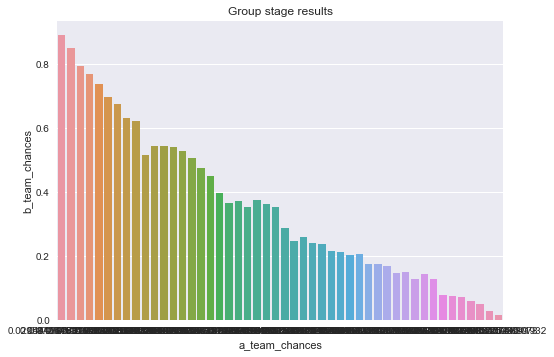

In [97]:
fg = seaborn.barplot(x="a_team_chances", y="b_team_chances",data=group_stage_results_df);
plt.title(f"Group stage results")
plt.savefig('bargraph.png')

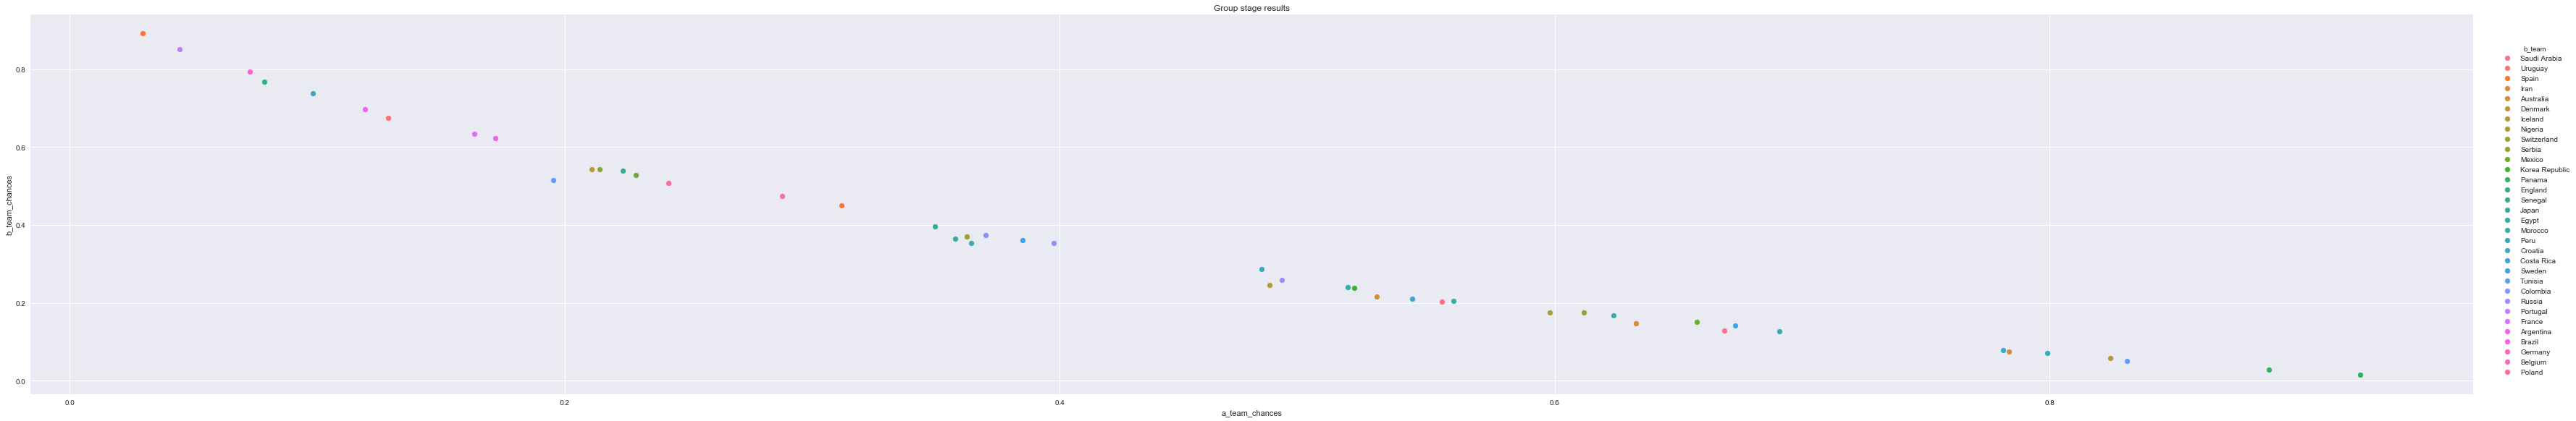

In [93]:
fg = seaborn.FacetGrid(data=group_stage_results_df, hue='b_team', size=8, aspect=6) #ylim={0.5, 1.5})
fg.map(plt.scatter, 'a_team_chances', 'b_team_chances').add_legend()
plt.title(f"Group stage results")
plt.savefig('scatter.png')

# plt.scatter(group_stage_results_df["a_team_chances"],
            group_stage_results_df["b_team_chances"],c=group_stage_results_df["draw_chances"],
            marker="o", linewidths=1,
            facecolors="purple",
            cmap='viridis',
            edgecolors="black",
            alpha=16)

# plt.legend()
plt.style.use('seaborn')
plt.title(f"Group stage results")
plt.ylabel("b_team",size=15)
plt.xlabel("a_team",size=15)
#plt.savefig('output/g.png')

group_stage_results_df.plot(kind="scatter", x="a_team_chances", y="b_team_chances", grid=True, figsize=(20,10), title="a_team vs b_team")
             
plt.show()

In [ ]:
# make predictions on the testing set
# y_pred = logreg.predict(X_test)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

In [ ]:
# from sklearn import metrics
# print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
# import seaborn

In [ ]:
# seaborn.distplot(y_pred)
# plt.show()

In [ ]:
# seaborn.distplot(test_model_df['real_results'])
# plt.show()

In [ ]:
# seaborn.distplot(test_model_df['normalized predictions'])
# plt.show()

In [ ]:
# data = [y_test, y_pred]

In [ ]:
# test_model_df = pd.DataFrame(data, index=['real_results', 'predictions']).transpose()

In [ ]:
# test_model_df

In [ ]:
# test_model_df["predictions"].value_counts()

In [ ]:
# def normalize_test_model(y):
#     if y > (4/3):
#         return 2
#     elif y < (2/3):
#         return 0
#     else:
#         return 1

In [ ]:
# counter = 0

# for index, row in test_model_df.iterrows():
#     if row['real_results'] == row['predictions']:
#         counter += 1
#     else:
#         continue
        
        
# counter / len(test_model_df)

In [ ]:
# test_model_df['normalized predictions'] = test_model_df['predictions'].apply(normalize_test_model)

In [ ]:
# count = 0

# for index, row in test_model_df.iterrows():
#     if row['real_results'] == row['normalized predictions']:
#         count += 1
        
# count / len(test_model_df)